## Time Series LSTM Solar Power Prediction based on Weather and solar farm Input data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/daily.xlsx')

In [5]:
df.to_csv('daily1.csv', encoding='utf-8', index = False)
dataset = pd.read_csv("daily1.csv", index_col = "Date")
dataset.head()
dataset.shape
dataset[['Solar energy']][366:]

,Solar energy
Date,
2017-02-01,13716
2017-02-02,24585
2017-02-03,25191
2017-02-04,16241
2017-02-05,27558
...,...
2017-10-25,13737
2017-10-26,27465
2017-10-27,15797


In [7]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)


Epoch 1/2000
2/2 - 0s - loss: 0.4925 - val_loss: 0.2343
Epoch 2/2000
2/2 - 0s - loss: 0.2149 - val_loss: 0.2677
Epoch 3/2000
2/2 - 0s - loss: 0.2221 - val_loss: 0.2489
Epoch 4/2000
2/2 - 0s - loss: 0.2139 - val_loss: 0.2337
Epoch 5/2000
2/2 - 0s - loss: 0.2091 - val_loss: 0.2343
Epoch 6/2000
2/2 - 0s - loss: 0.2032 - val_loss: 0.2500
Epoch 7/2000
2/2 - 0s - loss: 0.2130 - val_loss: 0.2523
Epoch 8/2000
2/2 - 0s - loss: 0.1962 - val_loss: 0.2383
Epoch 9/2000
2/2 - 0s - loss: 0.1926 - val_loss: 0.2360
Epoch 10/2000
2/2 - 0s - loss: 0.1986 - val_loss: 0.2435
Epoch 11/2000
2/2 - 0s - loss: 0.1933 - val_loss: 0.2496
Epoch 12/2000
2/2 - 0s - loss: 0.2033 - val_loss: 0.2397
Epoch 13/2000
2/2 - 0s - loss: 0.1980 - val_loss: 0.2369
Epoch 14/2000
2/2 - 0s - loss: 0.1919 - val_loss: 0.2406
Epoch 15/2000
2/2 - 0s - loss: 0.1897 - val_loss: 0.2450
Epoch 16/2000
2/2 - 0s - loss: 0.1899 - val_loss: 0.2369
Epoch 17/2000
2/2 - 0s - loss: 0.1934 - val_loss: 0.2379
Epoch 18/2000
2/2 - 0s - loss: 0.1933 - 

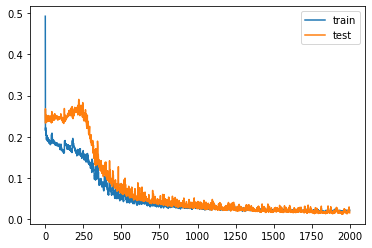

In [10]:
# design network
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=2000, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

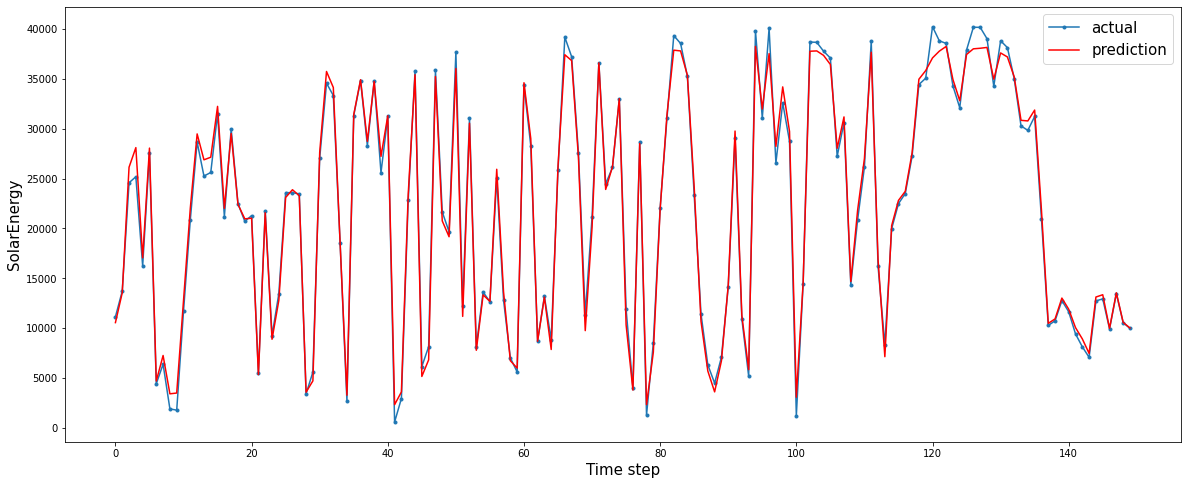

In [13]:
plt.figure(figsize = (20,8))
aa=[x for x in range(150)]
plt.plot(aa, inv_y[:150], marker='.', label="actual")
plt.plot(aa, inv_yhat[:150], 'r', label="prediction")
plt.ylabel('SolarEnergy', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()